In [25]:
import os
import cv2
import numpy as np
from tqdm import tqdm

def get_unique_pixel_values(image):
    unique_values = np.unique(image)
    return unique_values

image_path='/mnt/nas27/Dataset/Samsung_DM/val_source_gt/VALID_SOURCE_000.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
image[image == 255] = 12 #배경을 픽셀값 12로 간주
pixel_values = get_unique_pixel_values(image)
print(pixel_values)

[ 0  2  4  6  7  8 11 12]


In [19]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

def visualize_class_info(class_info):
    norm = mcolors.Normalize(vmin=0, vmax=12)  # 클래스 값 범위 설정 (0에서 12까지)
    colormap = plt.cm.viridis  # 사용할 색상 맵 설정

    # 클래스 정보의 값을 0에서 1 사이로 정규화
    class_info_normalized = class_info / 12.0

    plt.imshow(class_info_normalized, cmap=colormap, norm=norm)
    plt.colorbar(ticks=np.arange(0, 1.1, 0.1))  # 색상 막대에 표시될 눈금 설정
    plt.title('Class Info')
    plt.show()

def apply_fisheye_distortion(image_path, output_path, mask=False):
    # 이미지 불러오기
    if mask:
        image = cv2.imread(image_path, 0)
    else:
        image = cv2.imread(image_path)

    # 클래스 정보 추출 (예시: 클래스 정보가 0에서 12까지의 값으로 표현된다고 가정)
    class_info = image.copy()

    # 이미지 크기 가져오기
    height, width = image.shape[:2]

    # 카메라 매트릭스 생성
    focal_length = width / 4
    center_x = width / 2
    center_y = height / 2
    camera_matrix = np.array([[focal_length, 0, center_x],
                              [0, focal_length, center_y],
                              [0, 0, 1]], dtype=np.float32)

    # 왜곡 계수 생성
    dist_coeffs = np.array([0, 0.5, 0, 0], dtype=np.float32)

    # 왜곡 보정
    undistorted_image = cv2.undistort(image, camera_matrix, dist_coeffs)

    # 클래스 정보를 왜곡된 이미지에 정확한 위치에 다시 넣기
    undistorted_class_info = cv2.undistort(class_info, camera_matrix, dist_coeffs)

    # 이미지 저장
    cv2.imwrite(output_path, undistorted_class_info)
    # 위 함수를 사용하여 클래스 분포를 확인할 수 있습니다.
    visualize_class_info(class_info)
    visualize_class_info(undistorted_class_info)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


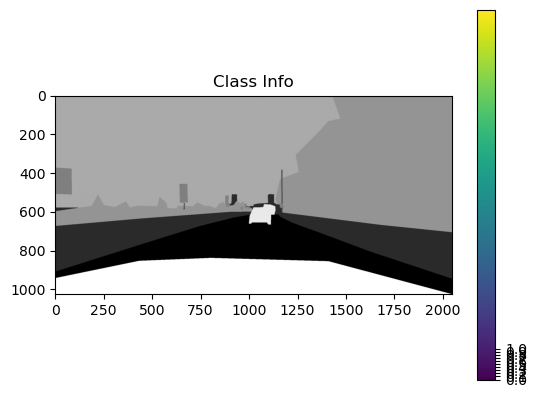

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


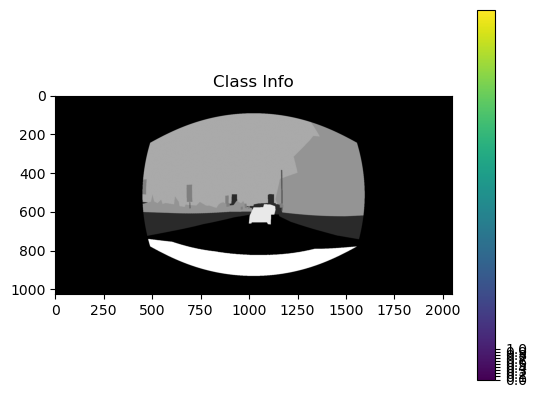

In [28]:
input_image_path = '/mnt/nas27/Dataset/Samsung_DM/val_source_gt/VALID_SOURCE_000.png'
output_image_path = '/mnt/nas27/Dataset/Samsung_DM/val_gt_temp/VALID_SOURCE_distorted.png'
apply_fisheye_distortion(input_image_path, output_image_path)

In [26]:
image_path='/mnt/nas27/Dataset/Samsung_DM/val_gt_temp/VALID_SOURCE_distorted.png'
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
pixel_values = get_unique_pixel_values(image)
print(pixel_values)

[  0   1   2   3   4   5   6   7   8   9  10  11  16  17  20  22  24  25
  26  27  30  32  34  35  37  38  40  42  47  48  55  56  58  64  68  71
  72  80  82  85  88  90  91  96 100 104 106 108 111 112 113 114 117 119
 120 121 123 128 131 132 135 137 143 147 151 157 159 162 166 167 168 170
 173 175 180 183 184 185 186 187 188 189 191 193 195 197 199 201 202 203
 205 207 215 216 222 223 224 231 233 234 235 239 242 245 246 247 248 249
 250 251 253 254 255]


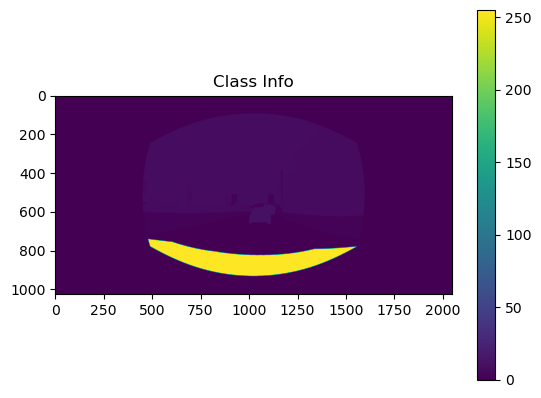

In [27]:
def visualize_class_info2(class_info):
    plt.imshow(class_info, cmap='viridis')  # 'viridis'는 색상 맵의 종류로 변경 가능합니다.
    plt.colorbar()
    plt.title('Class Info')
    plt.show()

# 위 함수를 사용하여 클래스 정보를 시각화할 수 있습니다.
class_info = cv2.imread('/mnt/nas27/Dataset/Samsung_DM/val_gt_temp/VALID_SOURCE_distorted.png', cv2.IMREAD_GRAYSCALE)
visualize_class_info2(class_info)


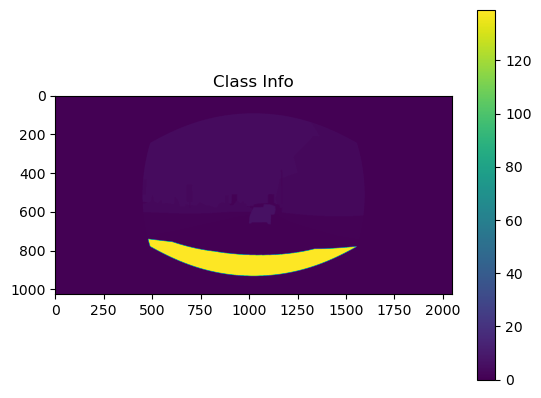

[  0   1   2   3   4   5   6   8   9  10  12  13  14  16  17  18  19  20
  21  22  25  26  30  31  34  37  38  39  43  44  46  48  49  52  54  56
  57  58  60  61  62  63  64  65  66  67  69  71  72  73  74  78  80  82
  85  86  88  90  91  92  94  95  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 117 121 122 126 127 128 130 132 133 134 135 136 138
 139]


In [31]:
def remap_pixel_values(image_path):
    # 이미지 불러오기
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # 클래스 정보를 13분할로 나누어서 0부터 12의 픽셀 값으로 변환
    remapped_image = (image / 22 * 12).astype(np.uint8)

    return remapped_image

image_path='/mnt/nas27/Dataset/Samsung_DM/val_gt_temp/VALID_SOURCE_distorted.png'
remapped_image_path=remap_pixel_values(image_path)
visualize_class_info2(remapped_image_path)
pixel_values = get_unique_pixel_values(remapped_image_path)
print(pixel_values)
